In [25]:
import tensorflow as tf

print(f"Tensorflow Version: {tf.__version__}")
print(tf.config.list_physical_devices("GPU"))

Tensorflow Version: 2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


31x31 Sized Models

31x31 Base

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import os


batch_size = 128
target_size = (31, 31)
color_mode = "grayscale"
num_classes = None  # This will be set after loading the data
learning_rate = 0.00005
dropout_rate = 0.6
epochs = 400

In [27]:
# 1. Import the image data
train_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_datagen.flow_from_directory(
    "./dataset/train",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
)


test_data = test_datagen.flow_from_directory(
    "./dataset/test",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 9028 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


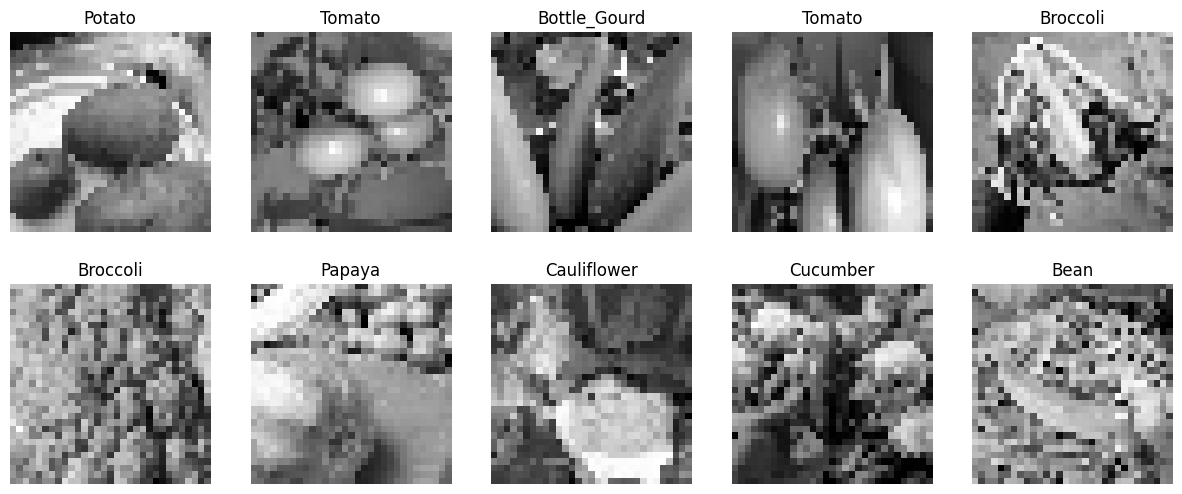

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels from the training data generator
images, labels = next(train_data)

# Set up the figure
plt.figure(figsize=(15, 6))

# Number of images you want to display
num_images = 10
num_cols = 5
num_rows = 2

# Display images
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i], cmap="gray")
    label_index = np.argmax(labels[i])
    label = list(train_data.class_indices.keys())[label_index]
    plt.title(label)
    plt.axis("off")
plt.show()

In [29]:
cnn31base = models.Sequential()

cnn31base.add(
    layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        input_shape=(target_size[0], target_size[1], 1),
        padding="same",
    )
)
cnn31base.add(layers.MaxPooling2D((2, 2)))
cnn31base.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
cnn31base.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
cnn31base.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
cnn31base.add(layers.MaxPooling2D((2, 2)))
cnn31base.add(layers.Flatten())
cnn31base.add(layers.Dropout(dropout_rate))
cnn31base.add(layers.Dense(512, activation="relu"))
cnn31base.add(layers.Dropout(dropout_rate))
cnn31base.add(layers.Dense(128, activation="relu"))
cnn31base.add(layers.Dropout(dropout_rate))
cnn31base.add(layers.Dense(train_data.num_classes, activation="softmax"))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
cnn31base.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)
print(cnn31base.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 31, 31, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 15, 15, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [30]:
checkpoint_dir = "./checkpoints31x31/"

In [31]:
def latest_checkpoint(checkpoint_dir):
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    return latest if latest else None

latest_checkpoint_path = latest_checkpoint(checkpoint_dir)

model_checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "model_epoch_{epoch:02d}.hdf5"),
    save_weights_only=True,
    save_freq="epoch",
    verbose=1,
)

steps_per_epoch = train_data.samples // batch_size
checkpoint_save_freq = steps_per_epoch * 10

model_checkpoint_callback.save_freq = checkpoint_save_freq

In [32]:
history31base = cnn31base.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_data,
    validation_steps=test_data.samples // batch_size,
    callbacks=[model_checkpoint_callback],
)

test_loss, test_acc = cnn31base.evaluate(
    test_data, steps=test_data.samples // batch_size, verbose=0
)

print(f"Test accuracy: {test_acc}")


Epoch 1/10
70/70 [==============================] - 8s 105ms/step - loss: 2.6956 - accuracy: 0.0792 - val_loss: 2.7104 - val_accuracy: 0.0662
Epoch 2/10
70/70 [==============================] - 7s 101ms/step - loss: 2.6677 - accuracy: 0.0988 - val_loss: 2.7124 - val_accuracy: 0.0649
Epoch 3/10
70/70 [==============================] - 7s 98ms/step - loss: 2.6514 - accuracy: 0.1019 - val_loss: 2.7062 - val_accuracy: 0.0690
Epoch 4/10
70/70 [==============================] - 7s 96ms/step - loss: 2.6284 - accuracy: 0.1100 - val_loss: 2.6651 - val_accuracy: 0.1233
Epoch 5/10
70/70 [==============================] - 7s 95ms/step - loss: 2.5687 - accuracy: 0.1366 - val_loss: 2.5781 - val_accuracy: 0.1484
Epoch 6/10
70/70 [==============================] - 7s 93ms/step - loss: 2.5125 - accuracy: 0.1667 - val_loss: 2.5041 - val_accuracy: 0.1743
Epoch 7/10
70/70 [==============================] - 7s 96ms/step - loss: 2.4536 - accuracy: 0.1778 - val_loss: 2.4497 - val_accuracy: 0.2079
Epoch 8/10


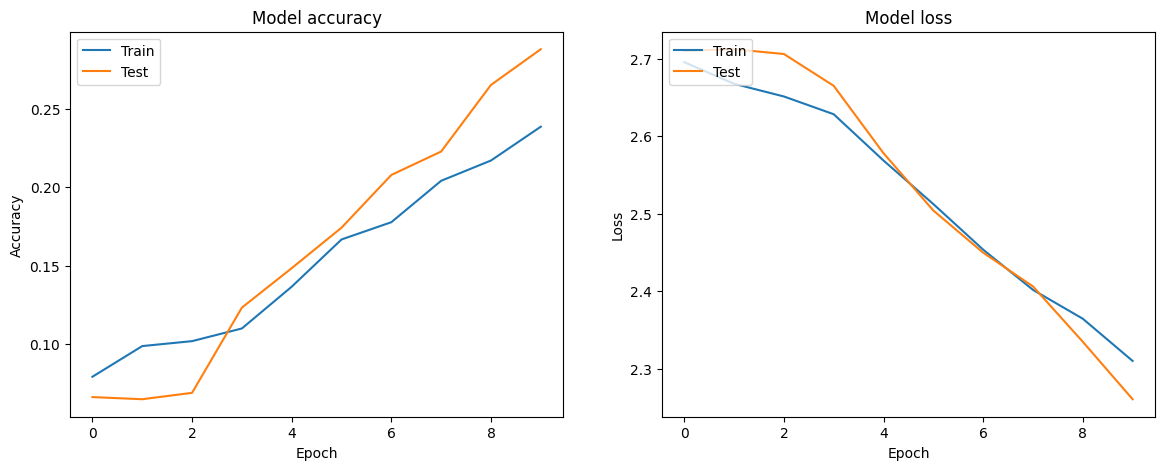

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history31base.history["accuracy"])
plt.plot(history31base.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history31base.history["loss"])
plt.plot(history31base.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

plt.show()

31x31 Augmented

In [2]:
batch_size = 128
target_size = (31, 31)
color_mode = "grayscale"
num_classes = None  # This will be set after loading the data
learning_rate = 0.00005
dropout_rate = 0.6
epochs = 400

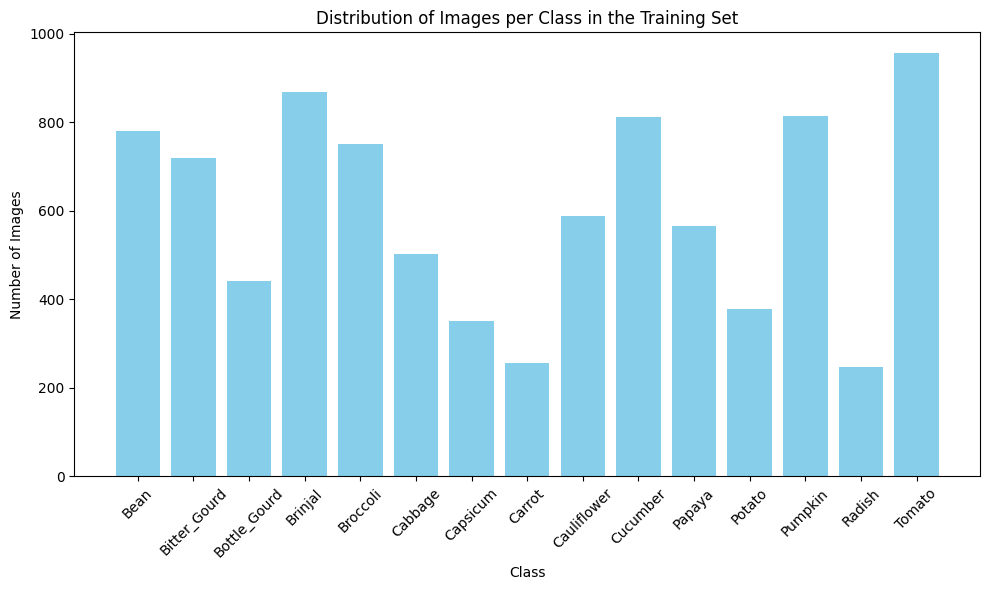

In [3]:
import os
import matplotlib.pyplot as plt

# Define the directory containing the training images
train_dir = "./dataset/train"

# Initialize a dictionary to hold the count of images in each class
class_counts = {}

# Iterate over each folder (class) in the training directory
for class_folder in os.listdir(train_dir):
    # Define the path to the class's folder
    class_folder_path = os.path.join(train_dir, class_folder)
    # Ensure the path is a directory
    if os.path.isdir(class_folder_path):
        # Count the number of images in this directory
        num_images = len(
            [
                entry
                for entry in os.listdir(class_folder_path)
                if os.path.isfile(os.path.join(class_folder_path, entry))
            ]
        )
        # Update the class_counts dictionary
        class_counts[class_folder] = num_images

# Now that we have the class counts, we can plot them

# Lists to hold the class names and the corresponding counts
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, image_counts, color="skyblue")

# Adding titles and labels
plt.title("Distribution of Images per Class in the Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)  # Rotate class names to avoid overlap

# Show the plot
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [5]:
import numpy as np

class_counts = {}
for sub_dir in os.listdir("./dataset/train"):
    class_counts[sub_dir] = len(os.listdir(os.path.join("./dataset/train", sub_dir)))

max_count = max(class_counts.values())
desired_count = max_count * 2

multiplication_factors = {
    class_name: desired_count // count for class_name, count in class_counts.items()
}
print(multiplication_factors)

{'Bean': 2, 'Bitter_Gourd': 2, 'Bottle_Gourd': 4, 'Brinjal': 2, 'Broccoli': 2, 'Cabbage': 3, 'Capsicum': 5, 'Carrot': 7, 'Cauliflower': 3, 'Cucumber': 2, 'Papaya': 3, 'Potato': 5, 'Pumpkin': 2, 'Radish': 7, 'Tomato': 2}


In [6]:
from keras.utils import to_categorical
from tensorflow.keras.utils import Sequence


# Custom Sequence object to feed to model.fit
class BalancedDataGenerator(Sequence):
    def __init__(
        self,
        datagen,
        directory,
        target_size,
        color_mode,
        batch_size,
        class_mode,
        multiplication_factors,
    ):
        self.datagen = datagen
        self.directory = directory
        self.target_size = target_size
        self.color_mode = color_mode
        self.batch_size = batch_size
        self.class_mode = class_mode
        self.multiplication_factors = multiplication_factors
        self.class_indices = self._get_class_indices()
        self.samples = sum(
            [
                len(files) * self.multiplication_factors[cls]
                for cls, files in self.class_indices.items()
            ]
        )

    def __len__(self):
        return int(np.floor(self.samples / self.batch_size))

    def _get_class_indices(self):
        class_indices = {}
        for class_name in os.listdir(self.directory):
            files = os.listdir(os.path.join(self.directory, class_name))
            class_indices[class_name] = files
        return class_indices

    def __getitem__(self, idx):
        batch_x = []
        batch_y = []
        classes = list(self.class_indices.keys())
        n_classes = len(classes)
        samples_per_class = self.batch_size // n_classes
        for class_index, class_name in enumerate(classes):
            class_files = self.class_indices[class_name]
            n_samples = samples_per_class * self.multiplication_factors[class_name]
            for _ in range(n_samples):
                image_index = np.random.choice(len(class_files))
                file_name = class_files[image_index]
                image_path = os.path.join(self.directory, class_name, file_name)
                image = self.datagen.load_img(
                    image_path, target_size=self.target_size, color_mode=self.color_mode
                )
                image = self.datagen.img_to_array(image)
                image = self.datagen.random_transform(image)
                batch_x.append(image)
                batch_y.append(class_index)
        batch_x = np.array(batch_x)
        batch_y = to_categorical(batch_y, num_classes=n_classes)
        return batch_x, batch_y


# Your existing ImageDataGenerator with augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="reflect",
)

# Create an instance of the custom BalancedDataGenerator
train_data = BalancedDataGenerator(
    train_datagen,
    directory="./dataset/train",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
    multiplication_factors=multiplication_factors,
)


test_datagen = ImageDataGenerator(rescale=1.0 / 255)


train_data = train_datagen.flow_from_directory(
    "./dataset/train",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
    save_to_dir=None,
    shuffle=True,
)


test_data = test_datagen.flow_from_directory(
    "./dataset/test",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 9028 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


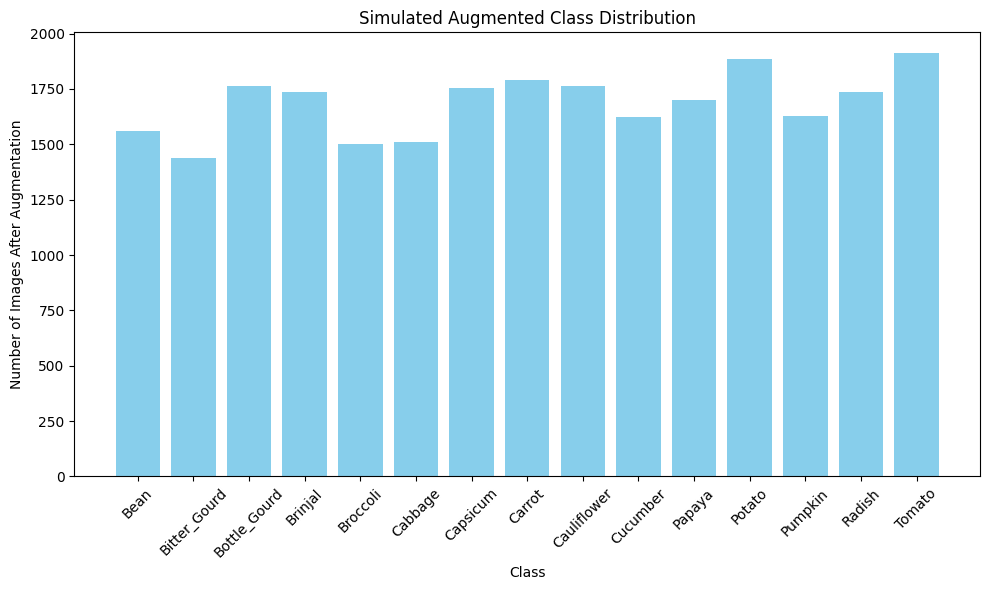

In [7]:
import matplotlib.pyplot as plt

augmented_distribution = {
    class_name: count * multiplication_factors[class_name]
    for class_name, count in class_counts.items()
}

classes = list(augmented_distribution.keys())
counts = list(augmented_distribution.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color="skyblue")

plt.title("Simulated Augmented Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images After Augmentation")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

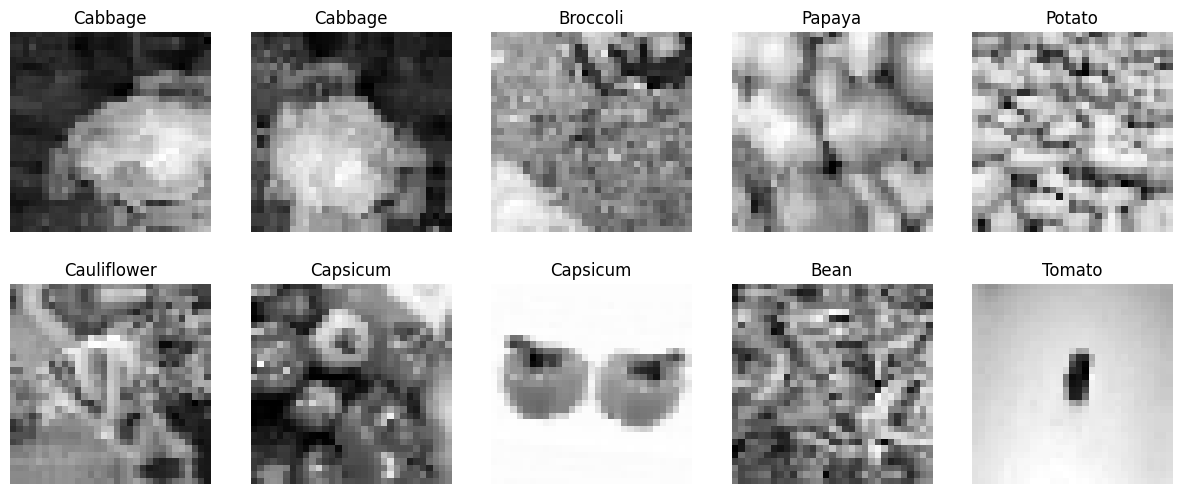

In [8]:
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the training data generator
images, labels = next(train_data)

# Set up the figure
plt.figure(figsize=(15, 6))

# Number of images you want to display
num_images = 10
num_cols = 5
num_rows = 2

# Display images
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i], cmap="gray")
    # Assuming the labels are one-hot encoded, find the label index with max value
    label_index = np.argmax(labels[i])
    # Fetch the class label using the class_indices attribute of the data generator
    label = list(train_data.class_indices.keys())[label_index]
    plt.title(label)
    plt.axis("off")
# Show the plot
plt.show()

In [ ]:
cnn31aug = models.Sequential()

cnn31aug.add(
    layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        input_shape=(target_size[0], target_size[1], 1),
        padding="same",
    )
)
cnn31aug.add(layers.MaxPooling2D((2, 2)))
cnn31aug.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
cnn31aug.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
cnn31aug.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
cnn31aug.add(layers.MaxPooling2D((2, 2)))
cnn31aug.add(layers.Flatten())
cnn31aug.add(layers.Dropout(dropout_rate))
cnn31aug.add(layers.Dense(512, activation="relu"))
cnn31aug.add(layers.Dropout(dropout_rate))
cnn31aug.add(layers.Dense(128, activation="relu"))
cnn31aug.add(layers.Dropout(dropout_rate))
cnn31aug.add(layers.Dense(train_data.num_classes, activation="softmax"))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
cnn31aug.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)
print(cnn31aug.summary())

In [ ]:
checkpoint_dir = "./checkpoints31x31aug/"

def latest_checkpoint(checkpoint_dir):
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    return latest if latest else None

latest_checkpoint_path = latest_checkpoint(checkpoint_dir)

model_checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "model_epoch_{epoch:02d}.hdf5"),
    save_weights_only=True,
    save_freq="epoch",
    verbose=1,
)

steps_per_epoch = train_data.samples // batch_size
checkpoint_save_freq = steps_per_epoch * 10

model_checkpoint_callback.save_freq = checkpoint_save_freq

In [ ]:
history31aug = cnn31aug.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_data,
    validation_steps=test_data.samples // batch_size,
    callbacks=[model_checkpoint_callback],
)

test_loss, test_acc = cnn31aug.evaluate(
    test_data, steps=test_data.samples // batch_size, verbose=0
)

print(f"Test accuracy: {test_acc}")


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history31aug.history["accuracy"])
plt.plot(history31aug.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history31aug.history["loss"])
plt.plot(history31aug.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.plot(history31base.history["val_accuracy"])
plt.plot(history31aug.history["val_accuracy"])
plt.title("Model Validation Accuracy Comparision")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Base31x31", "Augmented31x31"], loc="upper left")

plt.show()

128x128 Sized Models

In [18]:
# Hyperparameters
batch_size = 128
target_size = (128, 128)
color_mode = "grayscale"
num_classes = None
learning_rate = 0.00005
dropout_rate = 0.6
epochs = 100

train_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_datagen.flow_from_directory(
    "./dataset/train",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
)

test_data = test_datagen.flow_from_directory(
    "./dataset/test",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 9028 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


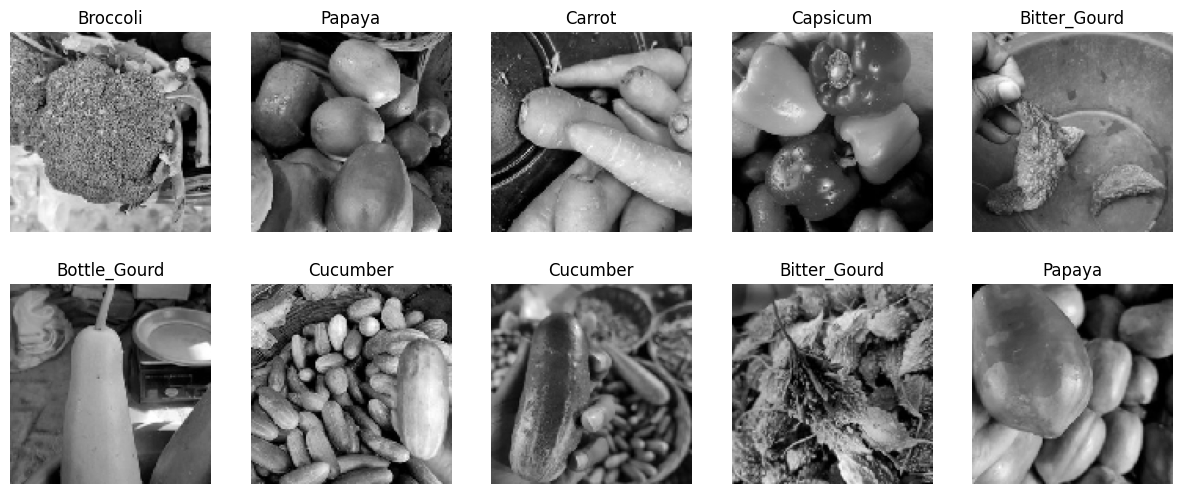

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images and labels from the training data generator
images, labels = next(train_data)

# Set up the figure
plt.figure(figsize=(15, 6))

# Number of images you want to display
num_images = 10
num_cols = 5
num_rows = 2

# Display images
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i], cmap="gray")
    # Assuming the labels are one-hot encoded, find the label index with max value
    label_index = np.argmax(labels[i])
    # Fetch the class label using the class_indices attribute of the data generator
    label = list(train_data.class_indices.keys())[label_index]
    plt.title(label)
    plt.axis("off")  # Hide the axis

# Show the plot
plt.show()

In [20]:
cnn128base = models.Sequential()

cnn128base.add(
    layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        input_shape=(target_size[0], target_size[1], 1),
        padding="same",
    )
)
cnn128base.add(layers.MaxPooling2D((2, 2)))
cnn128base.add(layers.Conv2D(128, (5, 5), activation="relu", padding="same"))
cnn128base.add(layers.MaxPooling2D((2, 2)))
cnn128base.add(layers.Conv2D(256, (3, 3), activation="relu", padding="same"))
cnn128base.add(layers.MaxPooling2D((2, 2)))
cnn128base.add(layers.Conv2D(512, (3, 3), activation="relu", padding="same"))
cnn128base.add(layers.MaxPooling2D((2, 2)))
cnn128base.add(layers.Flatten())
cnn128base.add(layers.Dropout(dropout_rate))
cnn128base.add(layers.Dense(1028, activation="relu"))
cnn128base.add(layers.Dropout(dropout_rate))
cnn128base.add(layers.Dense(128, activation="relu"))
cnn128base.add(layers.Dropout(dropout_rate))
cnn128base.add(layers.Dense(train_data.num_classes, activation="softmax"))


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
cnn128base.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)
print(cnn128base.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 128)       204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 256)     

In [21]:
checkpoint_dir = "./checkpoints128x128/"
steps_per_epoch = train_data.samples // batch_size
checkpoint_save_freq = steps_per_epoch * 10
model_checkpoint_callback.save_freq = checkpoint_save_freq

history128base = cnn128base.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_data,
    validation_steps=test_data.samples // batch_size,
    callbacks=[model_checkpoint_callback],
)

test_loss, test_acc = cnn128base.evaluate(
    test_data, steps=test_data.samples // batch_size, verbose=0
)

print(f"Test accuracy: {test_acc}")

Epoch 1/100
70/70 [==============================] - 25s 235ms/step - loss: 2.6687 - accuracy: 0.0898 - val_loss: 2.6954 - val_accuracy: 0.0659
Epoch 2/100
70/70 [==============================] - 21s 305ms/step - loss: 2.5808 - accuracy: 0.1217 - val_loss: 2.5142 - val_accuracy: 0.1382
Epoch 3/100
70/70 [==============================] - 16s 235ms/step - loss: 2.4232 - accuracy: 0.1945 - val_loss: 2.3682 - val_accuracy: 0.1912
Epoch 4/100
70/70 [==============================] - 17s 236ms/step - loss: 2.3075 - accuracy: 0.2440 - val_loss: 2.2258 - val_accuracy: 0.2921
Epoch 5/100
70/70 [==============================] - 17s 236ms/step - loss: 2.1708 - accuracy: 0.3009 - val_loss: 2.0233 - val_accuracy: 0.3679
Epoch 6/100
70/70 [==============================] - 17s 237ms/step - loss: 1.9966 - accuracy: 0.3703 - val_loss: 1.8076 - val_accuracy: 0.4399
Epoch 7/100
70/70 [==============================] - 17s 239ms/step - loss: 1.8701 - accuracy: 0.4164 - val_loss: 1.7620 - val_accuracy:

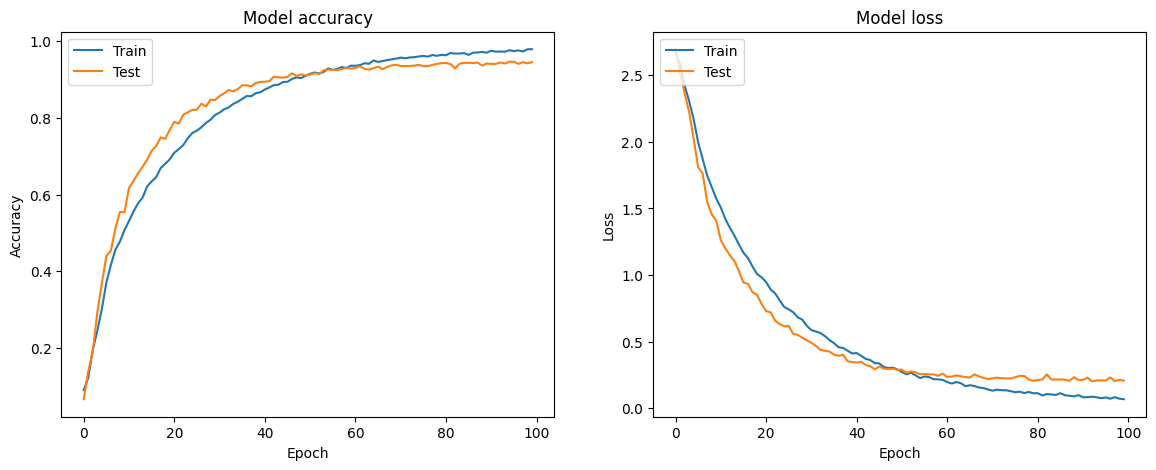

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history128base.history["accuracy"])
plt.plot(history128base.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history128base.history["loss"])
plt.plot(history128base.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

plt.show()

128x128 aug

In [23]:
batch_size = 64
target_size = (128, 128)
color_mode = "grayscale"
num_classes = None
learning_rate = 0.00025
dropout_rate = 0.6
epochs = 300

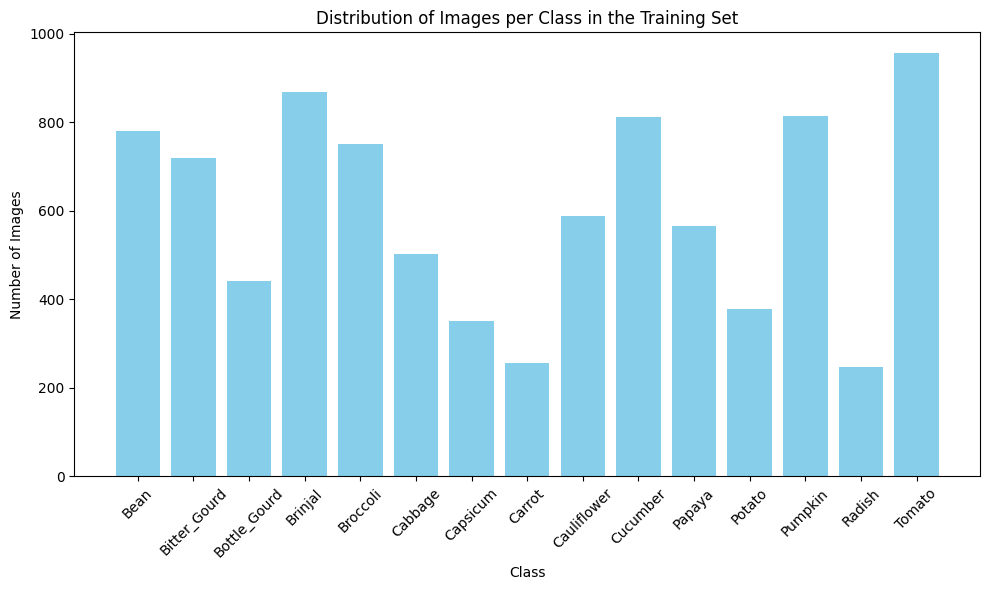

In [24]:
import os
import matplotlib.pyplot as plt

# Define the directory containing the training images
train_dir = "./dataset/train"

# Initialize a dictionary to hold the count of images in each class
class_counts = {}

# Iterate over each folder (class) in the training directory
for class_folder in os.listdir(train_dir):
    # Define the path to the class's folder
    class_folder_path = os.path.join(train_dir, class_folder)
    # Ensure the path is a directory
    if os.path.isdir(class_folder_path):
        # Count the number of images in this directory
        num_images = len(
            [
                entry
                for entry in os.listdir(class_folder_path)
                if os.path.isfile(os.path.join(class_folder_path, entry))
            ]
        )
        # Update the class_counts dictionary
        class_counts[class_folder] = num_images

# Now that we have the class counts, we can plot them

# Lists to hold the class names and the corresponding counts
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

In [25]:
import numpy as np

class_counts = {}
for sub_dir in os.listdir("./dataset/train"):
    class_counts[sub_dir] = len(os.listdir(os.path.join("./dataset/train", sub_dir)))

max_count = max(class_counts.values())
desired_count = max_count * 2

multiplication_factors = {
    class_name: desired_count // count for class_name, count in class_counts.items()
}
print(multiplication_factors)

{'Bean': 2, 'Bitter_Gourd': 2, 'Bottle_Gourd': 4, 'Brinjal': 2, 'Broccoli': 2, 'Cabbage': 3, 'Capsicum': 5, 'Carrot': 7, 'Cauliflower': 3, 'Cucumber': 2, 'Papaya': 3, 'Potato': 5, 'Pumpkin': 2, 'Radish': 7, 'Tomato': 2}


In [26]:
from keras.utils import to_categorical
from tensorflow.keras.utils import Sequence


# Custom Sequence object to feed to model.fit
class BalancedDataGenerator(Sequence):
    def __init__(
        self,
        datagen,
        directory,
        target_size,
        color_mode,
        batch_size,
        class_mode,
        multiplication_factors,
    ):
        self.datagen = datagen
        self.directory = directory
        self.target_size = target_size
        self.color_mode = color_mode
        self.batch_size = batch_size
        self.class_mode = class_mode
        self.multiplication_factors = multiplication_factors
        self.class_indices = self._get_class_indices()
        self.samples = sum(
            [
                len(files) * self.multiplication_factors[cls]
                for cls, files in self.class_indices.items()
            ]
        )

    def __len__(self):
        return int(np.floor(self.samples / self.batch_size))

    def _get_class_indices(self):
        class_indices = {}
        for class_name in os.listdir(self.directory):
            files = os.listdir(os.path.join(self.directory, class_name))
            class_indices[class_name] = files
        return class_indices

    def __getitem__(self, idx):
        batch_x = []
        batch_y = []
        classes = list(self.class_indices.keys())
        n_classes = len(classes)
        samples_per_class = self.batch_size // n_classes
        for class_index, class_name in enumerate(classes):
            class_files = self.class_indices[class_name]
            n_samples = samples_per_class * self.multiplication_factors[class_name]
            for _ in range(n_samples):
                image_index = np.random.choice(len(class_files))
                file_name = class_files[image_index]
                image_path = os.path.join(self.directory, class_name, file_name)
                image = self.datagen.load_img(
                    image_path, target_size=self.target_size, color_mode=self.color_mode
                )
                image = self.datagen.img_to_array(image)
                image = self.datagen.random_transform(image)
                batch_x.append(image)
                batch_y.append(class_index)
        batch_x = np.array(batch_x)
        batch_y = to_categorical(batch_y, num_classes=n_classes)
        return batch_x, batch_y


# Your existing ImageDataGenerator with augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="reflect",
)

# Create an instance of the custom BalancedDataGenerator
train_data = BalancedDataGenerator(
    train_datagen,
    directory="./dataset/train",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
    multiplication_factors=multiplication_factors,
)


test_datagen = ImageDataGenerator(rescale=1.0 / 255)


train_data = train_datagen.flow_from_directory(
    "./dataset/train",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
    save_to_dir=None,
    shuffle=True,
)


test_data = test_datagen.flow_from_directory(
    "./dataset/test",
    target_size=target_size,
    color_mode=color_mode,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 9028 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


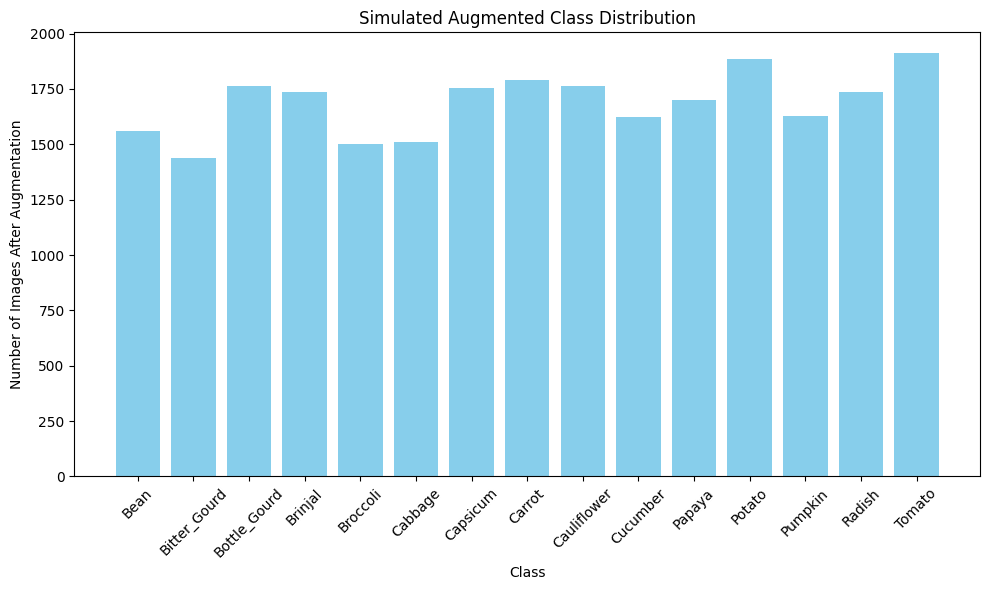

In [27]:
import matplotlib.pyplot as plt

augmented_distribution = {
    class_name: count * multiplication_factors[class_name]
    for class_name, count in class_counts.items()
}

classes = list(augmented_distribution.keys())
counts = list(augmented_distribution.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color="skyblue")

plt.title("Simulated Augmented Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images After Augmentation")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

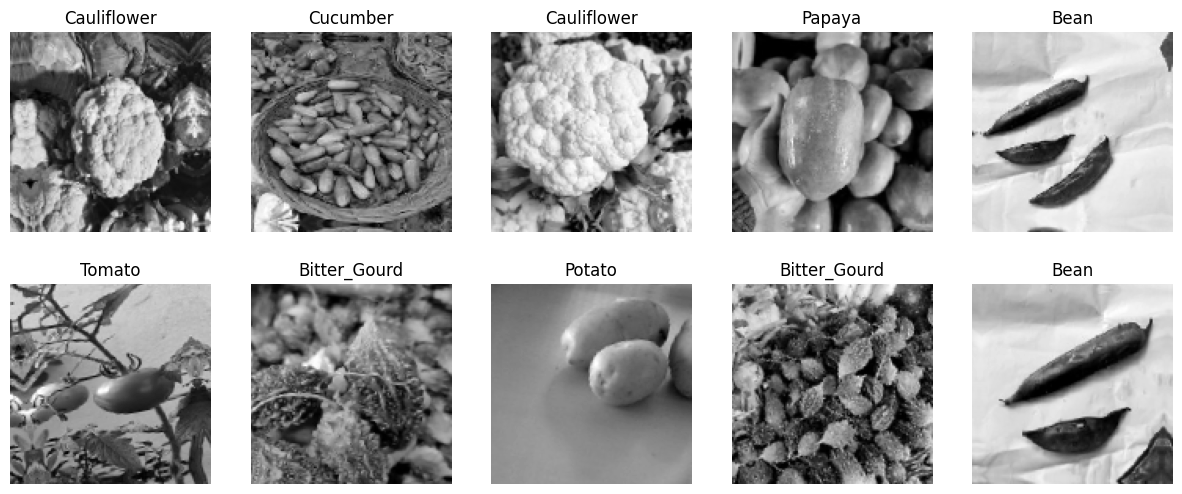

In [28]:
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the training data generator
images, labels = next(train_data)

# Set up the figure
plt.figure(figsize=(15, 6))

# Number of images you want to display
num_images = 10
num_cols = 5
num_rows = 2

# Display images
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i], cmap="gray")
    # Assuming the labels are one-hot encoded, find the label index with max value
    label_index = np.argmax(labels[i])
    # Fetch the class label using the class_indices attribute of the data generator
    label = list(train_data.class_indices.keys())[label_index]
    plt.title(label)
    plt.axis("off")
# Show the plot
plt.show()

In [29]:
cnn128aug = models.Sequential()


cnn128aug.add(
    layers.Conv2D(
        64,
        (5, 5),
        activation="elu",
        input_shape=(target_size[0], target_size[1], 1),
        padding="same",
    )
)
cnn128aug.add(layers.MaxPooling2D((2, 2)))
cnn128aug.add(layers.Conv2D(128, (3, 3), activation="elu", padding="same"))
cnn128aug.add(layers.MaxPooling2D((2, 2)))
cnn128aug.add(layers.Conv2D(256, (3, 3), activation="elu", padding="same"))
cnn128aug.add(layers.MaxPooling2D((2, 2)))
cnn128aug.add(layers.Conv2D(512, (3, 3), activation="elu", padding="same"))
cnn128aug.add(layers.MaxPooling2D((2, 2)))
cnn128aug.add(layers.GlobalAveragePooling2D())
cnn128aug.add(layers.Dropout(dropout_rate))
cnn128aug.add(layers.Dense(512, activation="relu"))
cnn128aug.add(layers.Dropout(dropout_rate))
cnn128aug.add(layers.Dense(train_data.num_classes, activation="softmax"))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
cnn128aug.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)
print(cnn128aug.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 64)      1664      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 256)     

In [30]:
checkpoint_dir = "./checkpoints128x128aug/"
steps_per_epoch = train_data.samples // batch_size
checkpoint_save_freq = steps_per_epoch * 10
model_checkpoint_callback.save_freq = checkpoint_save_freq

history128aug = cnn128aug.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_data,
    validation_steps=np.ceil(test_data.samples / batch_size),
    callbacks=[model_checkpoint_callback],
)

test_loss, test_acc = cnn128aug.evaluate(
    test_data, steps=test_data.samples // batch_size, verbose=0
)

print(f"Test accuracy: {test_acc}")

Epoch 1/200
141/141 [==============================] - 19s 111ms/step - loss: 2.5591 - accuracy: 0.1374 - val_loss: 2.5669 - val_accuracy: 0.1073
Epoch 2/200
141/141 [==============================] - 16s 115ms/step - loss: 2.3811 - accuracy: 0.1953 - val_loss: 2.3628 - val_accuracy: 0.2243
Epoch 3/200
141/141 [==============================] - 16s 114ms/step - loss: 2.1760 - accuracy: 0.2847 - val_loss: 2.3141 - val_accuracy: 0.2340
Epoch 4/200
141/141 [==============================] - 16s 113ms/step - loss: 1.9679 - accuracy: 0.3602 - val_loss: 2.1637 - val_accuracy: 0.2953
Epoch 5/200
141/141 [==============================] - 16s 111ms/step - loss: 1.8694 - accuracy: 0.3957 - val_loss: 2.1079 - val_accuracy: 0.2963
Epoch 6/200
141/141 [==============================] - 16s 113ms/step - loss: 1.7917 - accuracy: 0.4205 - val_loss: 1.9959 - val_accuracy: 0.3410
Epoch 7/200
141/141 [==============================] - 16s 111ms/step - loss: 1.6809 - accuracy: 0.4506 - val_loss: 1.9818 -

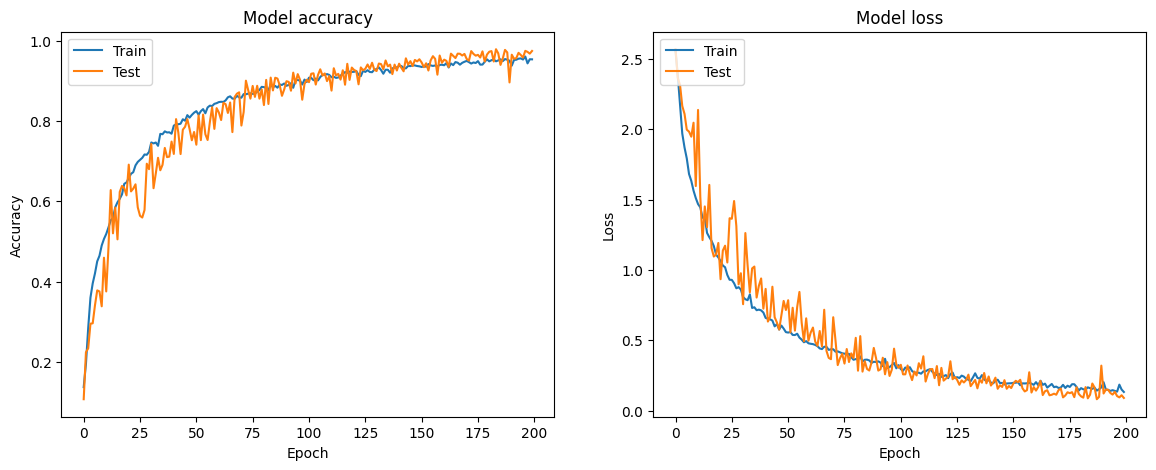

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history128aug.history["accuracy"])
plt.plot(history128aug.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history128aug.history["loss"])
plt.plot(history128aug.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

plt.show()

resnet 128x128

In [32]:
batch_size = 64
target_size = (128, 128)
color_mode = "grayscale"
num_classes = None
learning_rate = 0.00001
dropout_rate = 0.6
epochs = 200

In [36]:
from tensorflow.keras.applications.resnet import ResNet50

cnn128res = models.Sequential()
cnn128res.add(
    ResNet50(
        weights=None,
        include_top=False,
        input_shape=(128, 128, 1),
        classifier_activation="softmax",
    )
)
cnn128res.add(layers.GlobalAveragePooling2D())
cnn128res.add(layers.Dropout(dropout_rate))
cnn128res.add(layers.Dense(1028, activation="relu"))
cnn128res.add(layers.Dropout(dropout_rate))
cnn128res.add(layers.Dense(train_data.num_classes, activation="softmax"))

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
cnn128res.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)
print(cnn128res.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23581440  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_12 (Dropout)        (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 1028)              2106372   
                                                                 
 dropout_13 (Dropout)        (None, 1028)              0         
                                                                 
 dense_14 (Dense)            (None, 15)                15435     
                                                      

In [37]:
checkpoint_dir = "./checkpoints128x128resaug/"
steps_per_epoch = train_data.samples // batch_size
checkpoint_save_freq = steps_per_epoch * 10
model_checkpoint_callback.save_freq = checkpoint_save_freq

history128res = cnn128res.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_data,
    validation_steps=np.ceil(test_data.samples / batch_size),
    callbacks=[model_checkpoint_callback],
)

test_loss, test_acc = cnn128res.evaluate(
    test_data, steps=test_data.samples // batch_size, verbose=0
)

print(f"Test accuracy: {test_acc}")

Epoch 1/300
141/141 [==============================] - 36s 214ms/step - loss: 4.6072 - accuracy: 0.0811 - val_loss: 2.7419 - val_accuracy: 0.0667
Epoch 2/300
141/141 [==============================] - 27s 193ms/step - loss: 4.0275 - accuracy: 0.0907 - val_loss: 2.7692 - val_accuracy: 0.0677
Epoch 3/300
141/141 [==============================] - 27s 194ms/step - loss: 3.5882 - accuracy: 0.0964 - val_loss: 2.7633 - val_accuracy: 0.0677
Epoch 4/300
141/141 [==============================] - 28s 196ms/step - loss: 3.4065 - accuracy: 0.0924 - val_loss: 2.7290 - val_accuracy: 0.0743
Epoch 5/300
141/141 [==============================] - 28s 197ms/step - loss: 3.2020 - accuracy: 0.1034 - val_loss: 2.6988 - val_accuracy: 0.0667
Epoch 6/300
141/141 [==============================] - 28s 197ms/step - loss: 3.0338 - accuracy: 0.1131 - val_loss: 2.6045 - val_accuracy: 0.1397
Epoch 7/300
141/141 [==============================] - 28s 197ms/step - loss: 2.9801 - accuracy: 0.1107 - val_loss: 2.5751 -

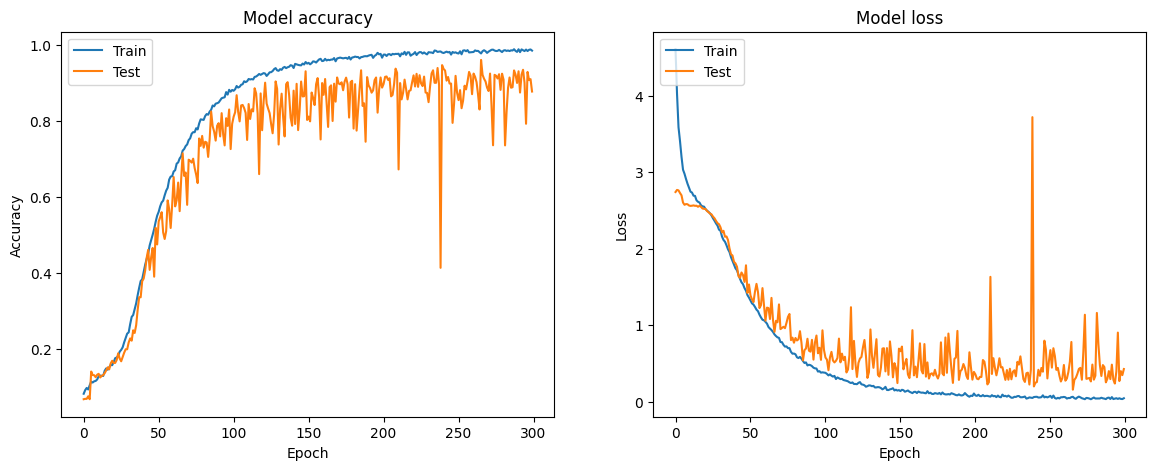

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history128res.history["accuracy"])
plt.plot(history128res.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history128res.history["loss"])
plt.plot(history128res.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


# Assuming history1 and history2 as before
base = len(history128base.history['val_accuracy'])
aug = len(history128aug.history['val_accuracy'])
res = len(history128res.history['val_accuracy'])

max_epochs = max(base, aug, res)

def interpolate_history(history, new_length):
    old_length = len(history.history['val_accuracy'])
    old_epochs = np.arange(old_length)
    new_epochs = np.linspace(0, old_length - 1, new_length)
    interpolated = interpolate.interp1d(old_epochs, history.history['val_accuracy'], kind='linear')
    return interpolated(new_epochs)


acc_base = interpolate_history(history128base, max_epochs)
acc_aug = interpolate_history(history128aug, max_epochs)
acc_res = interpolate_history(history128res, max_epochs)

plt.figure(figsize=(14, 5))
# Plotting both models
plt.plot(acc_base, label='Base 128x128')
plt.plot(acc_aug, label='Augmented 128x128')
plt.plot(acc_res, label='ResNet50 128x128')

# Labeling the plot
plt.title('Aligned Model Comparison by Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


base31 = len(history31base.history['val_accuracy'])
aug31 = len(history31aug.history['val_accuracy'])
base128 = len(history128base.history['val_accuracy'])
aug128 = len(history128aug.history['val_accuracy'])
res128 = len(history128res.history['val_accuracy'])

max_epochs = max(base31, aug31, base128, aug128, res128)

def interpolate_history(history, new_length):
    old_length = len(history.history['val_accuracy'])
    old_epochs = np.arange(old_length)
    new_epochs = np.linspace(0, old_length - 1, new_length)
    interpolated = interpolate.interp1d(old_epochs, history.history['val_accuracy'], kind='linear')
    return interpolated(new_epochs)

acc_base31 = interpolate_history(history31base, max_epochs)
acc_aug31 = interpolate_history(history31aug, max_epochs)
acc_base128 = interpolate_history(history128base, max_epochs)
acc_aug128 = interpolate_history(history128aug, max_epochs)
acc_res128 = interpolate_history(history128res, max_epochs)

plt.figure(figsize=(14, 5))
# Plotting both models
plt.plot(acc_base31, label='Base 31x31')
plt.plot(acc_aug31, label='Augmented 31x31')
plt.plot(acc_base128, label='Base 128x128')
plt.plot(acc_aug128, label='Augmented 128x128')
plt.plot(acc_res128, label='ResNet50 128x128')

# Labeling the plot
plt.title('Aligned Model Comparison by Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Show the plot
plt.show()